In [ ]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import scipy as sp
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
!apt-get install -q libgeos-3.5.0
!apt-get install -q libgeos-dev
!pip install -q https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists...
Building dependency tree...
Reading state information...
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists...
Building dependency tree...
Reading state information...
libgeos-dev is already the newest version (3.6.2-1build2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [ ]:
!pip install -q pyproj==1.9.6
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/cse /Sem 5/da/project/dataset_terror_error/modify_dataset.xlsx')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


world terror attack

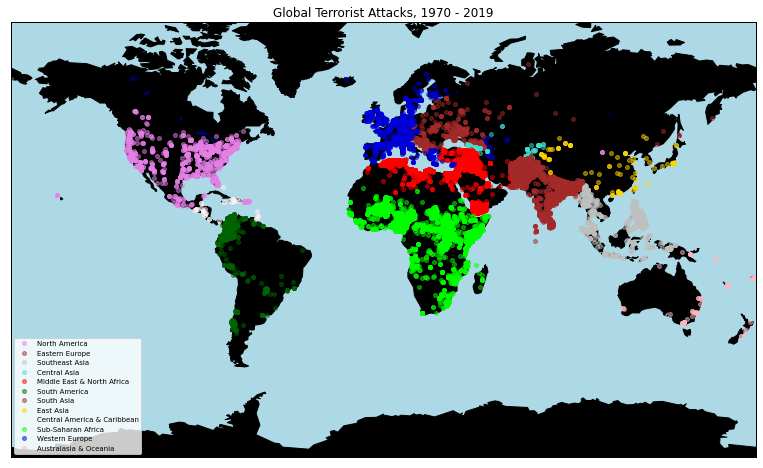

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.colors

def getRGB(col):
    rbgfinder = matplotlib.colors.ColorConverter()
    return rbgfinder.to_rgb(col)


regions = list(set(df.region_txt))

#I used the getRGB function to play with the colors and arrive at these long decimals.
colors = [(.9,.5,.9), (0.6470588235294118, 0.16470588235294117, 0.16470588235294117), (0.7529411764705882, 0.7529411764705882, 0.7529411764705882), (0.25098039215686274, 0.8784313725490196, 0.8156862745098039), (1,0,0), (0.0, 0.39215686274509803, 0.0), 'brown',(1.0, 0.8431372549019608, 0.0), (1.0, 0.9411764705882353, 0.9607843137254902), (0,1,0), (0,0,.85), (1.0, 0.7137254901960784, 0.7568627450980392)]
df1 = df
plt.figure(figsize=(15,8))

coldWorld = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
coldWorld.drawcountries()
coldWorld.drawcoastlines()
coldWorld.fillcontinents(color='black',lake_color='darkblue', zorder = 1)
coldWorld.drawmapboundary(fill_color='lightblue')

def plotAttacks(clr, rgn):
    xCoord, yCoord = coldWorld([i for i in df.longitude[df.region_txt == rgn]]
,[j for j in df.latitude[df.region_txt == rgn]]
)
    coldWorld.plot(xCoord, yCoord, "o", color = clr, label = rgn, markersize =4, alpha = .5)
 
for c, rgn in enumerate(regions):
    plotAttacks(colors[c],rgn)  
    
plt.legend(loc ='lower left', prop= {'size':7})
plt.title("Global Terrorist Attacks, 1970 - 2019")
plt.show()

#plot of locations of  theterrorist attacks based on latitude and longitude 

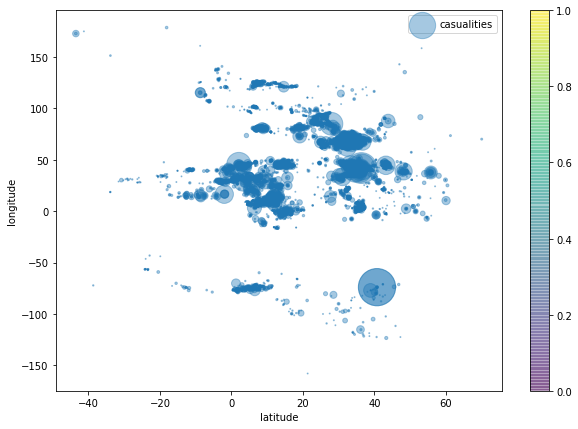

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
df.plot(kind="scatter", x="latitude", y="longitude", alpha=0.4,
    s=df['nkill'] ,label="casualities", figsize=(10,7),
    cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

#number of attacks vs years

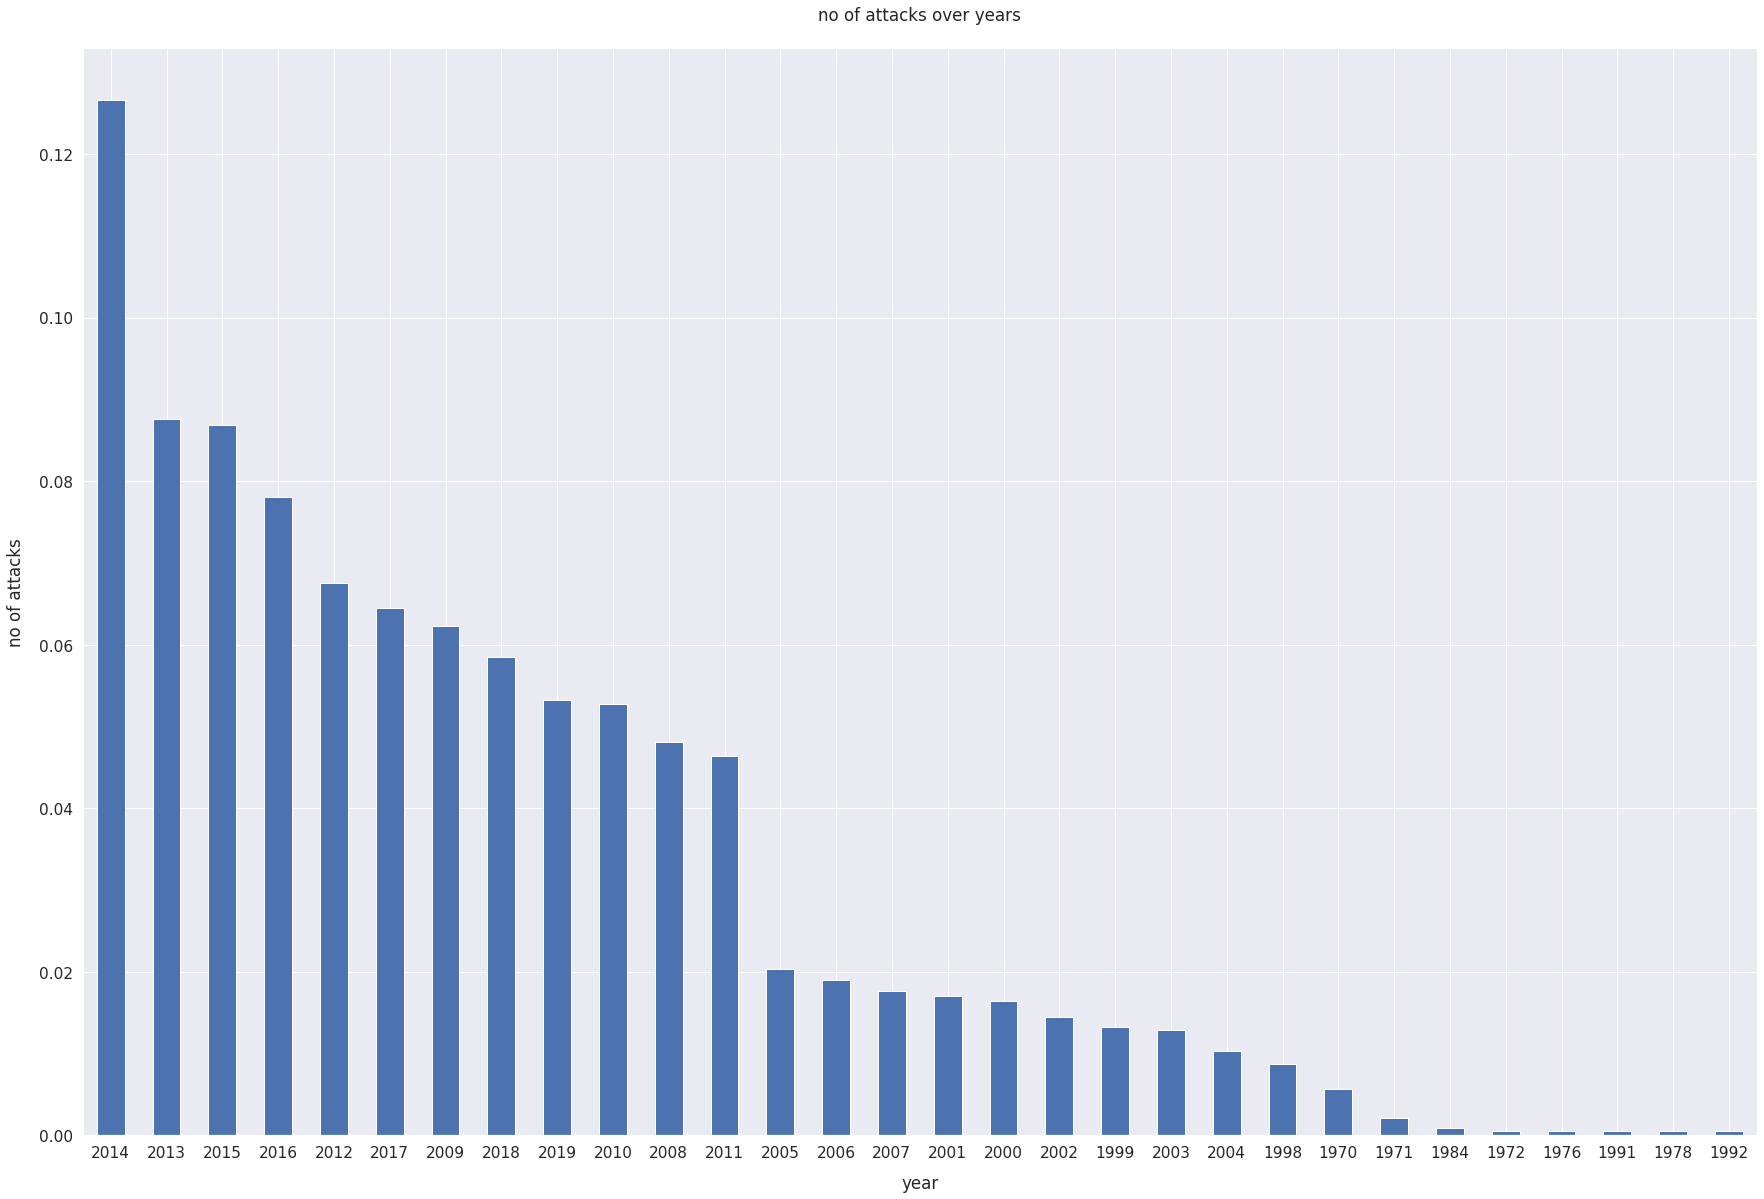

In [ ]:

sns.set(font_scale=1.4)
df['iyear'].value_counts(normalize=True).head(30).plot(kind='bar', figsize=(30, 20), rot=0)
plt.xlabel("year", labelpad=14)
plt.ylabel("no of attacks", labelpad=14)
plt.title("no of attacks over years", y=1.02);

#most active terrorist groups

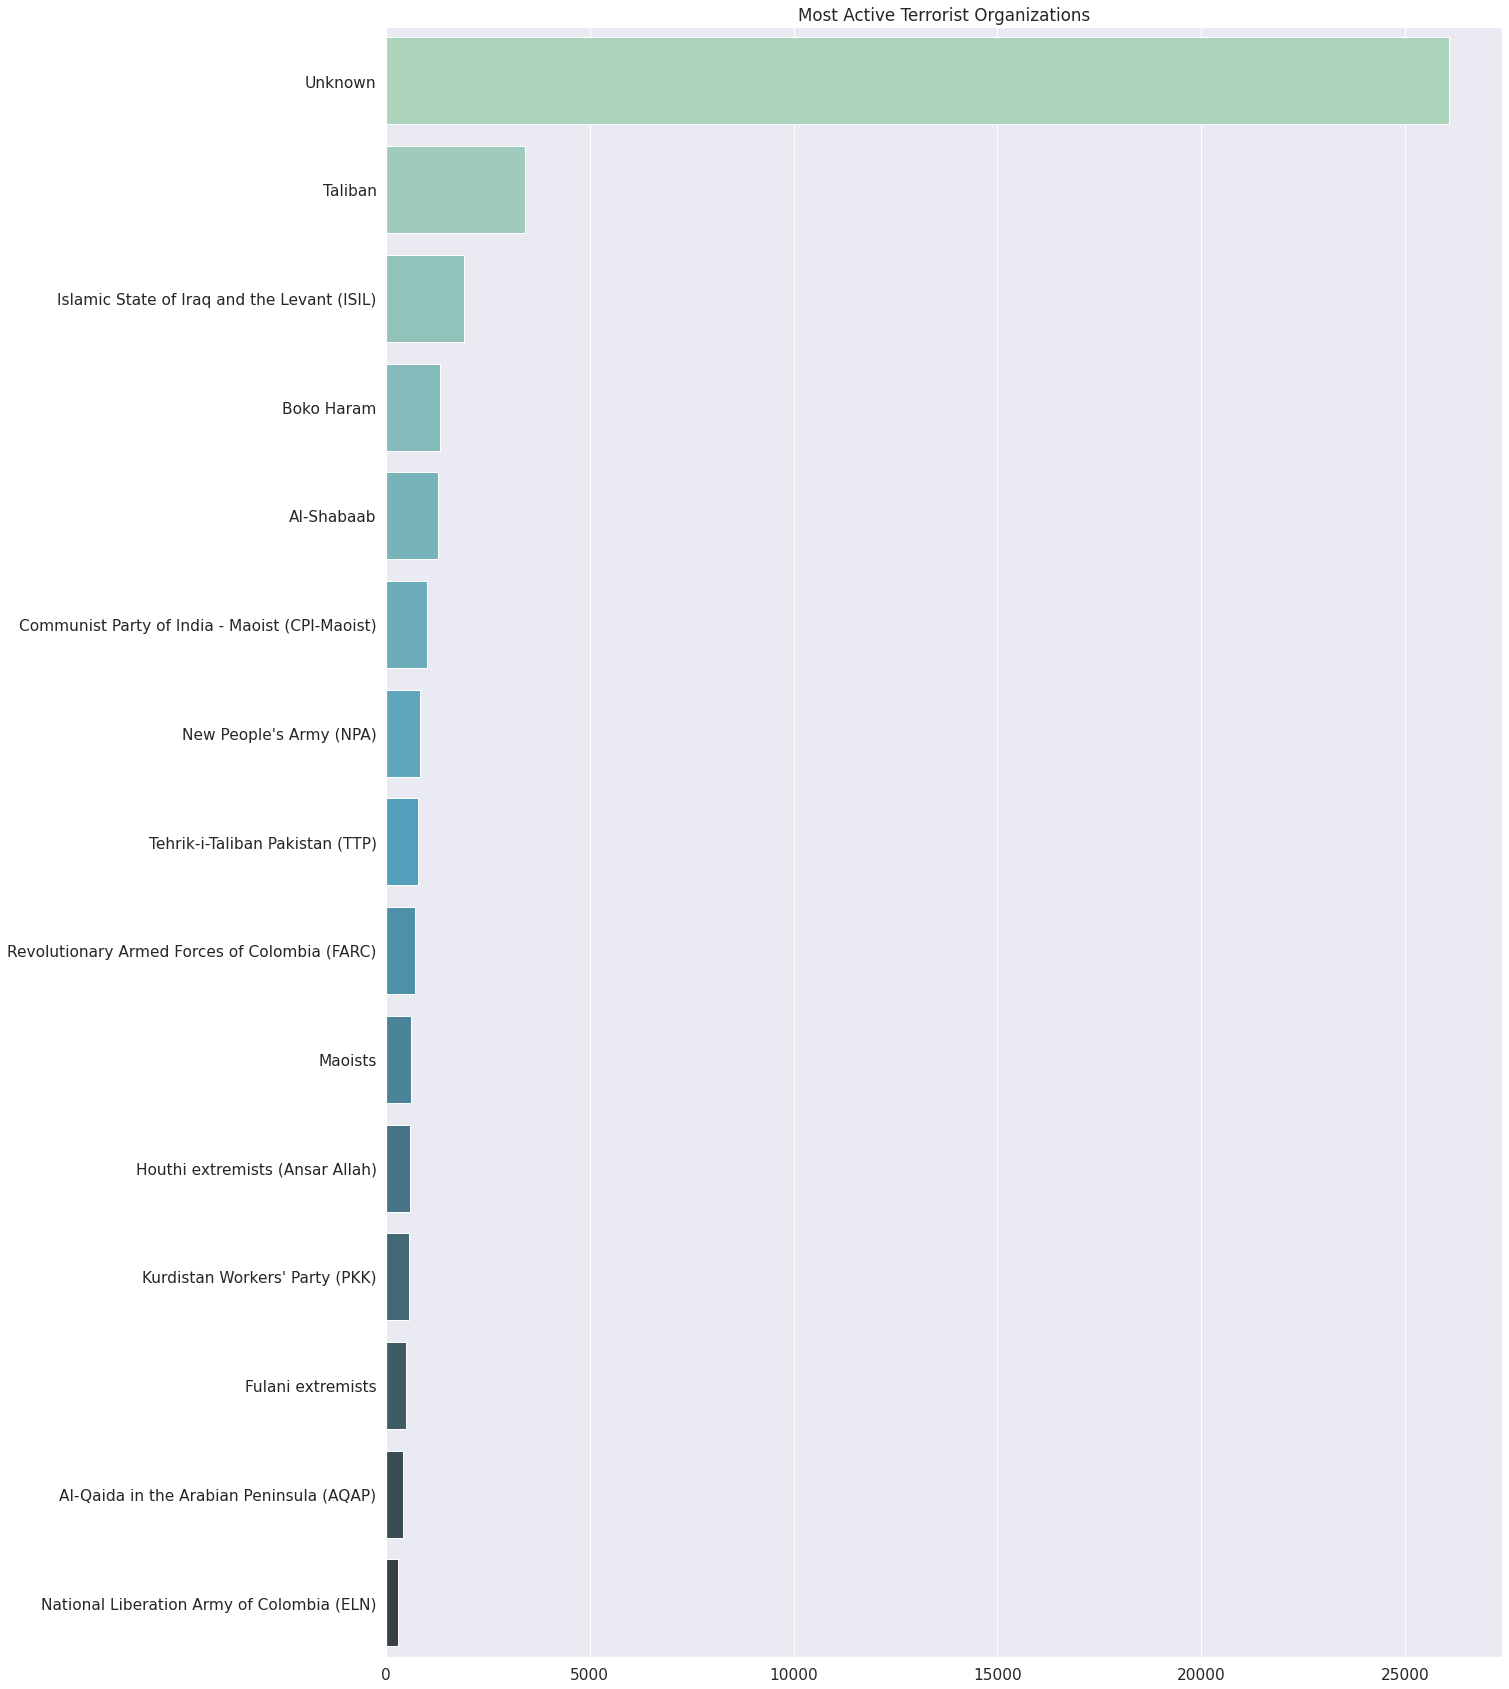

In [ ]:

f, ax = plt.subplots(figsize=(20, 30)) 
sns.barplot( y = df['gname'].value_counts().head(15).index,
            x = df['gname'].value_counts().head(15).values,
                palette="GnBu_d")

ax.set_title('Most Active Terrorist Organizations' );

#attack types

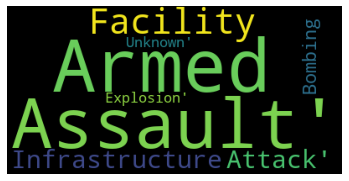

In [ ]:
from wordcloud import WordCloud
text = df['attacktype1_txt'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#summary of attacks done

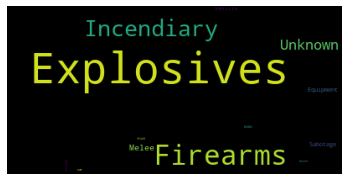

In [ ]:
text2 = " ".join(title for title in df.weaptype1_txt)

# Creating word_cloud with text as argument in .generate() method

word_cloud2 = WordCloud(collocations = False, background_color = 'black').generate(text2)

# Display the generated Word Cloud

plt.imshow(word_cloud2)

plt.axis("off")

plt.show()

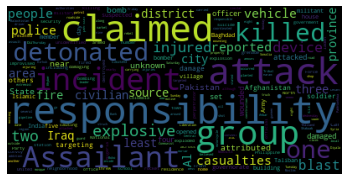

In [ ]:
text2 = " ".join(title for title in df.summary)

# Creating word_cloud with text as argument in .generate() method

word_cloud2 = WordCloud(collocations = False, background_color = 'black').generate(text2)

# Display the generated Word Cloud

plt.imshow(word_cloud2)

plt.axis("off")

plt.show()

Evaluation for each model

In [ ]:

cv = RepeatedKFold(n_splits=15, n_repeats=4, random_state=50)
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    
    print(confusion_matrix(true, predicted))
    print(classification_report(true, predicted))
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

Model making
1. predicting property loss  during an attack

In [ ]:
x = df[['targtype1','weaptype1','nkill','nkillter']]
y = df['property']
x_train, x_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2,random_state = 42)
# RANDOMFOREST CLASSIFIER

clf =  RandomForestClassifier()
scores_prop = cross_val_score(clf, x_train, Y_train , cv = cv, scoring= 'accuracy')
clf.fit(x_train,Y_train)
y_pred_prop=clf.predict(x_test)
print_evaluate(Y_test,y_pred_prop)

[[  13    0  599]
 [   1    0   28]
 [  45    4 9842]]
              precision    recall  f1-score   support

          -9       0.22      0.02      0.04       612
           0       0.00      0.00      0.00        29
           1       0.94      1.00      0.97      9891

    accuracy                           0.94     10532
   macro avg       0.39      0.34      0.34     10532
weighted avg       0.90      0.94      0.91     10532

MAE: 0.6153627041397646
MSE: 6.125427269274592
RMSE: 2.4749600540765484
R2 Square -0.1192601209843358
__________________________________


##2. classifcation of attack type

BUILDING KNN model for classification

In [25]:
X=pd.concat([df['latitude'],df['longitude'],df['crit1'],df['crit2'],df['crit3'],df['weaptype1'],df['nkill'],df['extended'],df['multiple'],df['success'],df['targtype1'],df['natlty1'],df['weaptype1']],axis=1)
y=df['attacktype1']


In [26]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


1. first checking whick value of k suits are data

Text(0, 0.5, 'Mean Error')

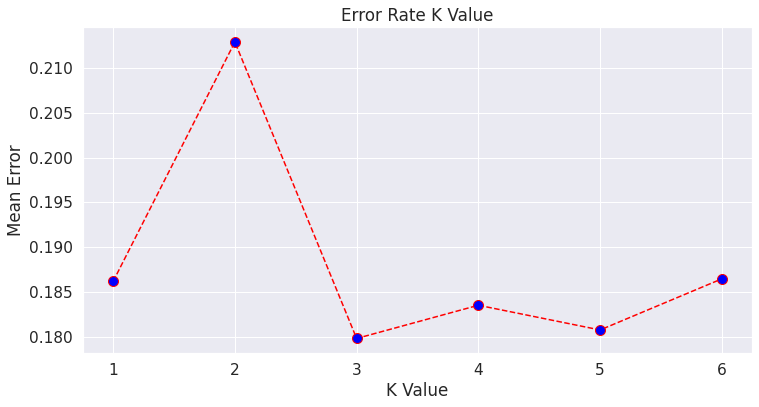

In [27]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 7):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 7), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [28]:
knn = KNeighborsClassifier(n_neighbors= 3)
scores_knn = cross_val_score(knn, X_train, y_train , cv = cv, scoring= 'accuracy')
model_knn=knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)
print_evaluate(y_test, y_pred_knn)

[[ 258  139  192    1    0    0    8    1    9]
 [ 120 1135  301    2    2   23  111    0    5]
 [  70  155 5990    0    4    6   42    0    0]
 [   1   20   10    3    0    3   10    0    3]
 [   2   12   20    0    6    0    8    0    0]
 [  21   93   48    5    0   51   23    0   15]
 [  19  133  117    6    8   13 1105    6   14]
 [   0    4    2    0    0    2   19    6    0]
 [   6   11    5    4    3   22   14    1   84]]
              precision    recall  f1-score   support

           1       0.52      0.42      0.47       608
           2       0.67      0.67      0.67      1699
           3       0.90      0.96      0.92      6267
           4       0.14      0.06      0.08        50
           5       0.26      0.12      0.17        48
           6       0.42      0.20      0.27       256
           7       0.82      0.78      0.80      1421
           8       0.43      0.18      0.26        33
           9       0.65      0.56      0.60       150

    accuracy             

BUILDING RANDOM FOREST MODEL

In [29]:
model_random=RandomForestClassifier(n_estimators=10)
model_random.fit(X_train,y_train)
y_pred_random=model_random.predict(X_test)
scores_random = cross_val_score(model_random, X_train, y_train , cv = cv, scoring= 'accuracy')
print_evaluate(y_test, y_pred_random)

[[ 375  110  107    0    1    6    3    0    6]
 [  75 1320  135    3    4   36  123    1    2]
 [  62   51 6126    0    2    7   19    0    0]
 [   0   22    1    3    0   13    6    1    4]
 [   0   11   14    1    7    4    9    0    2]
 [   9   57   14    1    0  151   18    1    5]
 [   5  121    9    5   10   10 1241    3   17]
 [   1    3    0    0    0    1   15   13    0]
 [   3    2    0    0    0    3   19    0  123]]
              precision    recall  f1-score   support

           1       0.71      0.62      0.66       608
           2       0.78      0.78      0.78      1699
           3       0.96      0.98      0.97      6267
           4       0.23      0.06      0.10        50
           5       0.29      0.15      0.19        48
           6       0.65      0.59      0.62       256
           7       0.85      0.87      0.86      1421
           8       0.68      0.39      0.50        33
           9       0.77      0.82      0.80       150

    accuracy             

BUILDING BAGGING MODEL

In [30]:
model_dec = DecisionTreeClassifier()
num_trees =8  
# bagging classifier
model_bagging = BaggingClassifier(base_estimator = model_dec,
                          n_estimators = num_trees,
                          random_state = 8)
  
scores_bagging = cross_val_score(model_bagging, X_train, y_train, cv = cv)
model_bagging.fit(X_train,y_train)
y_pred_bagging=model_bagging.predict(X_test)
print_evaluate(y_test, y_pred_bagging)

[[ 374  110  111    0    0    3    2    1    7]
 [  78 1308  133    3    6   45  120    2    4]
 [  63   62 6112    0    4    6   20    0    0]
 [   2   17    1    7    1   11    6    1    4]
 [   0   12   14    0    6    4   12    0    0]
 [   7   60   12    0    3  148   16    1    9]
 [   7  129   13    4   11   15 1223    3   16]
 [   1    4    0    0    0    1   11   16    0]
 [   4    2    0    2    0    5   23    0  114]]
              precision    recall  f1-score   support

           1       0.70      0.62      0.65       608
           2       0.77      0.77      0.77      1699
           3       0.96      0.98      0.97      6267
           4       0.44      0.14      0.21        50
           5       0.19      0.12      0.15        48
           6       0.62      0.58      0.60       256
           7       0.85      0.86      0.86      1421
           8       0.67      0.48      0.56        33
           9       0.74      0.76      0.75       150

    accuracy             

#Visualization

comparing all 3 models

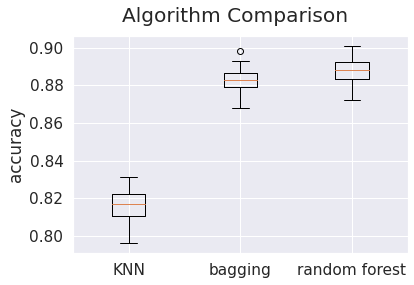

In [31]:
models = []
models.append('KNN' )
models.append('bagging' )
models.append('random forest')
results = [scores_knn,scores_bagging,scores_random]
scoring = 'accuracy'

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(models)
plt.ylabel("accuracy")
plt.show()

#RANDOM FOREST: Visualizing 1 node of decision tree 

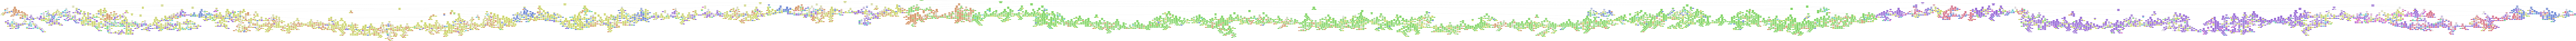

In [ ]:
X_features=list(X.columns)
Y_features=list("attack_type")
# Extract single tree
estimator = model_random.estimators_[0]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X_features,
                class_names = Y_features,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')